In [2]:
import cv2

In [3]:
import os

In [4]:
from mtcnn import MTCNN

C:\Users\Aditya Babaso Patil\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from PIL import Image

In [6]:
from tensorflow.keras.models import load_model

In [7]:
import numpy as np

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [9]:
detector=MTCNN()              #creates a MTCNN object named detector

In [10]:
embedding_list=[]

In [11]:
model = load_model('resnet50_NotopLayer_244x244x3_AvgPooling.h5')

In [12]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 122, 122, 64)         9408      ['input_1[0][0]']             
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 122, 122, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation (Activation)     (None, 122, 122, 64)         0         ['conv1/7x7_s2/

                                                                    ]                             
                                                                                                  
 conv2_3_3x3 (Conv2D)        (None, 60, 60, 64)           36864     ['activation_7[0][0]']        
                                                                                                  
 conv2_3_3x3/bn (BatchNorma  (None, 60, 60, 64)           256       ['conv2_3_3x3[0][0]']         
 lization)                                                                                        
                                                                                                  
 activation_8 (Activation)   (None, 60, 60, 64)           0         ['conv2_3_3x3/bn[0][0]']      
                                                                                                  
 conv2_3_1x1_increase (Conv  (None, 60, 60, 256)          16384     ['activation_8[0][0]']        
 2D)      

 )                                                                                                
                                                                                                  
 conv3_3_1x1_reduce/bn (Bat  (None, 30, 30, 128)          512       ['conv3_3_1x1_reduce[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 activation_16 (Activation)  (None, 30, 30, 128)          0         ['conv3_3_1x1_reduce/bn[0][0]'
                                                                    ]                             
                                                                                                  
 conv3_3_3x3 (Conv2D)        (None, 30, 30, 128)          147456    ['activation_16[0][0]']       
                                                                                                  
 conv3_3_3

                                                                    ]',                           
                                                                     'conv4_1_1x1_proj/bn[0][0]'] 
                                                                                                  
 activation_24 (Activation)  (None, 15, 15, 1024)         0         ['add_7[0][0]']               
                                                                                                  
 conv4_2_1x1_reduce (Conv2D  (None, 15, 15, 256)          262144    ['activation_24[0][0]']       
 )                                                                                                
                                                                                                  
 conv4_2_1x1_reduce/bn (Bat  (None, 15, 15, 256)          1024      ['conv4_2_1x1_reduce[0][0]']  
 chNormalization)                                                                                 
          

 add_10 (Add)                (None, 15, 15, 1024)         0         ['conv4_4_1x1_increase/bn[0][0
                                                                    ]',                           
                                                                     'activation_30[0][0]']       
                                                                                                  
 activation_33 (Activation)  (None, 15, 15, 1024)         0         ['add_10[0][0]']              
                                                                                                  
 conv4_5_1x1_reduce (Conv2D  (None, 15, 15, 256)          262144    ['activation_33[0][0]']       
 )                                                                                                
                                                                                                  
 conv4_5_1x1_reduce/bn (Bat  (None, 15, 15, 256)          1024      ['conv4_5_1x1_reduce[0][0]']  
 chNormali

 conv5_1_1x1_increase/bn (B  (None, 8, 8, 2048)           8192      ['conv5_1_1x1_increase[0][0]']
 atchNormalization)                                                                               
                                                                                                  
 conv5_1_1x1_proj/bn (Batch  (None, 8, 8, 2048)           8192      ['conv5_1_1x1_proj[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_13 (Add)                (None, 8, 8, 2048)           0         ['conv5_1_1x1_increase/bn[0][0
                                                                    ]',                           
                                                                     'conv5_1_1x1_proj/bn[0][0]'] 
                                                                                                  
 activatio

In [205]:
sample_image_array=cv2.imread(r"C:\Users\Aditya Babaso Patil\Desktop\Photos\Meetup Photos\IMG_20220126_175458.jpg") #used imread() of cv2 to read the image into array form

In [206]:
sample_image_array.shape

(4000, 3000, 3)

In [207]:
photo_info=detector.detect_faces(sample_image_array)            #gives the coordinates of various parts of the human face present in the sample_image as a list of dictionary
photo_info                                                #info like face box coordinates,eye coordinates,nose coordinates,etc

1/1 [==============================] - 0s 25ms/step


[{'box': [1772, 1111, 320, 375],
  'confidence': 0.9999967813491821,
  'keypoints': {'left_eye': (1861, 1242),
   'right_eye': (2017, 1242),
   'nose': (1938, 1298),
   'mouth_left': (1863, 1387),
   'mouth_right': (2008, 1389)}},
 {'box': [1090, 893, 331, 381],
  'confidence': 0.9999932050704956,
  'keypoints': {'left_eye': (1187, 1027),
   'right_eye': (1341, 1023),
   'nose': (1272, 1096),
   'mouth_left': (1192, 1169),
   'mouth_right': (1348, 1167)}}]

In [212]:
x,y,width,height=photo_info[1]['box']           #gives the coordinates of the face box

In [213]:
#face=sample_image_array[250:800,250:700] 

In [214]:
face=sample_image_array[y:y+height,x:x+width]      #here, using the face box coordinates from photo_info,we extract the face from the sample_image_array and store it in face
face.shape

(381, 331, 3)

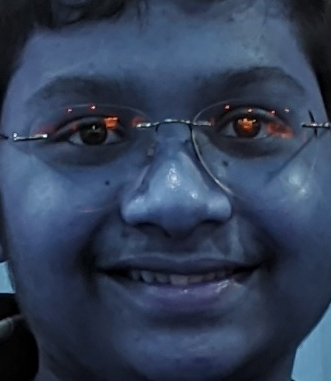

In [215]:
face_image=Image.fromarray(face)          #creates an image from face and stores in into face_image
face_image

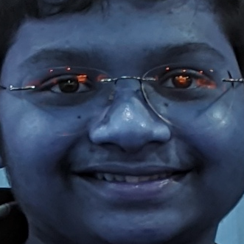

In [216]:
face_image=face_image.resize((244,244))   #resizes the face_image into (244,244)
face_image

In [217]:
'''
sample_image_array=cv2.imread(r"C:\Users\Aditya Babaso Patil\Desktop\Photos\mussuorie_2\IMG_20230127_160948.jpg")
photo_info=detector.detect_faces(sample_image_array) 
for i in photo_info:
    x,y,width,height=i['box'] 
    face=sample_image_array[y:y+height,x:x+width]
    face = np.flip(face, axis=-1)
    face_image=Image.fromarray(face)
    face_image=face_image.resize((244,244))
    unique_id = str(uuid.uuid4())+'.png'
    face_image.save(os.path.join('abcd', unique_id))'''
    
 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 35-36: truncated \UXXXXXXXX escape (948003651.py, line 11)

## face_array=np.asarray(face_image)           #converts the face_image back into a np array named face_array
print(face_array.shape)

face_array=face_array.astype('float32')     #changes the dtype all all the numbers in face_array to float32

expanded_face_array=np.expand_dims(face_array,axis=0)      #expands the dims to allow making a batch out of it later
expanded_face_array.shape

In [218]:
face_array=np.asarray(face_image)
print(face_array.shape)

face_array=face_array.astype('float32')     #changes the dtype all all the numbers in face_array to float32

expanded_face_array=np.expand_dims(face_array,axis=0)      #expands the dims to allow making a batch out of it later
expanded_face_array.shape

(244, 244, 3)


(1, 244, 244, 3)

In [219]:
#Second_img=expanded_face_array

In [220]:
preprocessed_face_array=preprocess_input(expanded_face_array)     #preprocesses the expanded_face_array

In [221]:
First_img=preprocessed_face_array

In [222]:
face_embeddings=model.predict(preprocessed_face_array).flatten()  #runs the resnet model on the preprocessed_face_array to get face_embeddings

1/1 [==============================] - 0s 63ms/step


In [223]:
face_embeddings.shape

(2048,)

In [224]:
embedding_list.append({'Suhas':face_embeddings})

In [225]:
len(embedding_list)

11

In [134]:
embedding_list=pickle.load(open('embedding_list.pkl','rb'))
#actors_photo_path=pickle.load(open('actors_photo_path2.pkl','rb'))

In [226]:
import pickle

In [227]:
pickle.dump(embedding_list,open('embedding_list2.pkl','wb'))

In [228]:
embedding_list

[{'Somali': array([0.        , 0.02052348, 0.7583287 , ..., 0.        , 0.58862007,
         1.8396289 ], dtype=float32)},
 {'Tanmay': array([0.08480802, 0.15907498, 0.2721074 , ..., 2.9748435 , 0.02668469,
         0.97987294], dtype=float32)},
 {'Niraj': array([0.        , 2.4848158 , 1.758761  , ..., 0.03315748, 0.47376505,
         0.        ], dtype=float32)},
 {'Sap': array([ 0.       , 12.063729 ,  2.8697398, ...,  0.9824923,  5.241072 ,
          2.0781324], dtype=float32)},
 {'Deb': array([0.       , 1.1941613, 3.3855116, ..., 8.489569 , 0.       ,
         5.6674824], dtype=float32)},
 {'Adi': array([0.        , 5.9141617 , 0.8078763 , ..., 5.3020487 , 0.13025233,
         0.        ], dtype=float32)},
 {'Harshita': array([0.8347911 , 4.173461  , 0.        , ..., 5.4111066 , 0.50947493,
         2.500552  ], dtype=float32)},
 {'Akanksha': array([0.        , 3.4665244 , 0.03890402, ..., 6.9425673 , 0.17757319,
         0.        ], dtype=float32)},
 {'Rishi': array([0.02551594

In [35]:
#embedding_list=np.array(embedding_list)

In [22]:
def preprocess_image_and_save_to_folders(source_path, destination_folder):
   

    #sample_image_array_RGB = np.asarray(Image.open(source_path))
    
    sample_image_array_BGR=cv2.imread(source_path)
    
    sample_image_array_RGB = np.flip(sample_image_array_BGR, axis=-1)
    
    photo_info=detector.detect_faces(sample_image_array_BGR)            #gives the coordinates of various parts of the human face present in the sample_image as a list of dictionary

    if len(photo_info)>0:
        for i in photo_info:
            if i['confidence']>=0.9:
                x,y,width,height=i['box']           #gives the coordinates of the face box
        
                face_BGR=sample_image_array_BGR[y:y+height,x:x+width]      #here, using the face box coordinates from photo_info,we extract the face from the sample_image_array and store it in face
                face_image_BGR=Image.fromarray(face_BGR)          #creates an image from face and stores in into face_image
                face_image_BGR=face_image_BGR.resize((244,244))   #resizes the face_image into (244,244)
        
                face_array_BGR=np.asarray(face_image_BGR)           #converts the face_image back into a np array named face_array
                face_array_BGR=face_array_BGR.astype('float32')     #changes the dtype all all the numbers in face_array to float32
                expanded_face_array_BGR=np.expand_dims(face_array_BGR,axis=0)      #expands the dims to allow making a batch out of it later
                preprocessed_face_array_BGR=preprocess_input(expanded_face_array_BGR)     #preprocesses the expanded_face_array
        
                face_embeddings=model.predict(preprocessed_face_array_BGR).flatten()  #runs the resnet model on the preprocessed_face_array to get face_embeddings
        
                unique_face_name,unique_face_id = get_name_and_id(face_embeddings,embedding_list)
                unique_face_id=unique_face_id+'.jpg'
        
                face_RGB = sample_image_array_RGB[y:y+height,x:x+width]
                face_image_RGB=Image.fromarray(face_RGB)
        
        
                face_image_RGB.save(os.path.join(destination_folder, unique_face_name,unique_face_id))
            else:
                continue
        
    else:
        return 
            

In [331]:
preprocess_image_and_save_to_folders(r"C:\Users\Aditya Babaso Patil\Desktop\Photos\mussuorie_2\IMG20230128182112.jpg", 'face_recogni')

1/1 [==============================] - 0s 62ms/step


In [21]:
def get_name_and_id(face_embeddings,embedding_list):
    
    max_sim=0
    name=' '
    
    for i in embedding_list:
        
        k=cosine_similarity(face_embeddings.reshape(1,-1),list(i.values())[0].reshape(1,-1))      # .reshape(1,-1) converts the one dimensional face_embeddings and features[0] (of shape (2048,)) to shape(1,2048) as the cosine_similarity function takes only 2d inputs
        
        if k[0][0]>max_sim:
            max_sim=k[0][0]
            name=list(i.keys())[0]
            
    
    unique_id = str(uuid.uuid4())
    
    return name,unique_id

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
import uuid

In [137]:
!pip install uuid

In [18]:
from tqdm import tqdm

In [19]:
folder=os.listdir('test_images')  
photo_paths=[]                          #list which will store path of all photos 

for photo in folder:                           
    
    photo_path=os.path.join('test_images',photo)         #this variable stores the pathfor 1 photo of single actor at a time
    photo_paths.append(photo_path)

In [20]:
photo_paths

['test_images\\IMG20230127155928.jpg',
 'test_images\\IMG20230127155937.jpg',
 'test_images\\IMG20230127160608.jpg',
 'test_images\\IMG20230127160610.jpg',
 'test_images\\IMG20230127160646.jpg',
 'test_images\\IMG20230127160650.jpg',
 'test_images\\IMG20230127160659.jpg',
 'test_images\\IMG20230127160701.jpg',
 'test_images\\IMG20230127160703.jpg',
 'test_images\\IMG20230127162619.jpg',
 'test_images\\IMG20230127162653.jpg',
 'test_images\\IMG20230127162702.jpg',
 'test_images\\IMG20230127162942.jpg',
 'test_images\\IMG20230127163313.jpg',
 'test_images\\IMG20230127163319.jpg',
 'test_images\\IMG20230127163339.jpg',
 'test_images\\IMG20230127163342.jpg',
 'test_images\\IMG20230127163358.jpg',
 'test_images\\IMG20230127163402.jpg',
 'test_images\\IMG20230127163437.jpg',
 'test_images\\IMG20230127163541.jpg',
 'test_images\\IMG20230127163543.jpg',
 'test_images\\IMG20230127163634.jpg',
 'test_images\\IMG20230127163636.jpg',
 'test_images\\IMG20230127163726.jpg',
 'test_images\\IMG2023012

In [23]:


for photo in tqdm(photo_paths):
    
    k=preprocess_image_and_save_to_folders(photo, 'face_recogni')
    
    

  0%|                                                                                          | 0/176 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


  1%|▍                                                                                 | 1/176 [00:07<21:53,  7.51s/it]

1/1 [==============================] - 0s 64ms/step


  1%|▉                                                                                 | 2/176 [00:12<17:25,  6.01s/it]

1/1 [==============================] - 0s 66ms/step


  2%|█▍                                                                                | 3/176 [00:37<42:54, 14.88s/it]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                                | 4/176 [00:40<28:46, 10.04s/it]

1/1 [==============================] - 0s 70ms/step


  3%|██▎                                                                               | 5/176 [00:45<23:02,  8.08s/it]

1/1 [==============================] - 0s 74ms/step


  3%|██▊                                                                               | 6/176 [00:49<19:00,  6.71s/it]

1/1 [==============================] - 0s 65ms/step


  4%|███▎                                                                              | 7/176 [00:53<16:32,  5.88s/it]

1/1 [==============================] - 0s 68ms/step


  5%|███▋                                                                              | 8/176 [00:57<15:05,  5.39s/it]

1/1 [==============================] - 0s 106ms/step


  5%|████▏                                                                             | 9/176 [01:02<14:41,  5.28s/it]

2/2 [==============================] - 0s 5ms/step


  6%|████▌                                                                            | 10/176 [01:07<14:14,  5.15s/it]

1/1 [==============================] - 0s 74ms/step


  6%|█████                                                                            | 11/176 [01:12<13:55,  5.07s/it]

1/1 [==============================] - 0s 107ms/step


  7%|█████▌                                                                           | 12/176 [01:17<13:56,  5.10s/it]

1/1 [==============================] - 0s 131ms/step


  7%|█████▉                                                                           | 13/176 [01:48<34:59, 12.88s/it]

1/1 [==============================] - 0s 83ms/step


  8%|██████▍                                                                          | 14/176 [01:54<29:16, 10.84s/it]

1/1 [==============================] - 0s 77ms/step


  9%|██████▉                                                                          | 15/176 [02:00<25:25,  9.47s/it]

1/1 [==============================] - 0s 113ms/step


  9%|███████▎                                                                         | 16/176 [02:06<22:31,  8.45s/it]

1/1 [==============================] - 0s 69ms/step


 10%|███████▊                                                                         | 17/176 [02:13<20:54,  7.89s/it]

1/1 [==============================] - 0s 120ms/step


 10%|████████▎                                                                        | 18/176 [02:19<19:16,  7.32s/it]

1/1 [==============================] - 0s 118ms/step


 11%|████████▋                                                                        | 19/176 [02:25<18:29,  7.07s/it]

1/1 [==============================] - 0s 72ms/step


 11%|█████████▏                                                                       | 20/176 [02:33<18:39,  7.17s/it]

1/1 [==============================] - 0s 77ms/step


 12%|█████████▋                                                                       | 21/176 [02:42<20:21,  7.88s/it]

3/3 [==============================] - 0s 20ms/step


 12%|██████████▏                                                                      | 22/176 [02:53<22:16,  8.68s/it]

1/1 [==============================] - 0s 113ms/step


 13%|██████████▌                                                                      | 23/176 [02:59<19:53,  7.80s/it]

1/1 [==============================] - 0s 28ms/step


 14%|███████████                                                                      | 24/176 [03:04<17:42,  6.99s/it]

2/2 [==============================] - 0s 20ms/step


 14%|███████████▌                                                                     | 25/176 [03:09<16:35,  6.59s/it]

1/1 [==============================] - 0s 72ms/step


 15%|███████████▉                                                                     | 26/176 [03:14<15:00,  6.01s/it]

1/1 [==============================] - 0s 23ms/step


 15%|████████████▍                                                                    | 27/176 [03:19<14:15,  5.74s/it]

2/2 [==============================] - 0s 7ms/step


 16%|████████████▉                                                                    | 28/176 [03:24<13:18,  5.39s/it]

1/1 [==============================] - 0s 72ms/step


 16%|█████████████▎                                                                   | 29/176 [03:31<14:10,  5.79s/it]

1/1 [==============================] - 0s 157ms/step


 17%|█████████████▊                                                                   | 30/176 [03:38<15:11,  6.24s/it]

1/1 [==============================] - 0s 94ms/step


 18%|██████████████▎                                                                  | 31/176 [03:42<13:32,  5.60s/it]

1/1 [==============================] - 0s 102ms/step


 18%|██████████████▋                                                                  | 32/176 [03:50<15:02,  6.27s/it]

1/1 [==============================] - 0s 72ms/step


 19%|███████████████▏                                                                 | 33/176 [03:55<14:30,  6.09s/it]

1/1 [==============================] - 0s 24ms/step


 19%|███████████████▋                                                                 | 34/176 [04:01<14:18,  6.04s/it]

1/1 [==============================] - 0s 103ms/step


 20%|████████████████                                                                 | 35/176 [04:07<14:05,  5.99s/it]

1/1 [==============================] - 0s 71ms/step


 20%|████████████████▌                                                                | 36/176 [04:13<14:07,  6.06s/it]

1/1 [==============================] - 0s 71ms/step


 21%|█████████████████                                                                | 37/176 [04:24<17:20,  7.49s/it]

1/1 [==============================] - 0s 72ms/step


 22%|█████████████████▍                                                               | 38/176 [04:35<19:45,  8.59s/it]

1/1 [==============================] - 0s 106ms/step


 22%|█████████████████▉                                                               | 39/176 [04:48<21:59,  9.63s/it]

1/1 [==============================] - 0s 78ms/step


 23%|██████████████████▍                                                              | 40/176 [04:54<19:22,  8.55s/it]

1/1 [==============================] - 0s 101ms/step


 23%|██████████████████▊                                                              | 41/176 [05:00<17:34,  7.81s/it]

1/1 [==============================] - 0s 76ms/step


 24%|███████████████████▎                                                             | 42/176 [05:05<16:04,  7.20s/it]

1/1 [==============================] - 0s 101ms/step


 24%|███████████████████▊                                                             | 43/176 [05:11<14:42,  6.64s/it]

1/1 [==============================] - 0s 68ms/step


 25%|████████████████████▎                                                            | 44/176 [05:16<13:46,  6.26s/it]

1/1 [==============================] - 0s 117ms/step


 26%|████████████████████▋                                                            | 45/176 [05:23<14:02,  6.43s/it]

1/1 [==============================] - 0s 99ms/step


 26%|█████████████████████▏                                                           | 46/176 [05:29<13:34,  6.27s/it]

1/1 [==============================] - 0s 71ms/step


 27%|█████████████████████▋                                                           | 47/176 [05:34<12:52,  5.99s/it]

1/1 [==============================] - 0s 64ms/step


 27%|██████████████████████                                                           | 48/176 [05:40<12:26,  5.83s/it]

1/1 [==============================] - 0s 17ms/step


 28%|██████████████████████▌                                                          | 49/176 [05:44<11:29,  5.43s/it]

5/5 [==============================] - 0s 5ms/step


 28%|███████████████████████                                                          | 50/176 [05:49<11:08,  5.30s/it]

5/5 [==============================] - 0s 5ms/step


 29%|███████████████████████▍                                                         | 51/176 [05:53<10:24,  4.99s/it]

5/5 [==============================] - 0s 20ms/step


 30%|███████████████████████▉                                                         | 52/176 [06:04<14:01,  6.78s/it]

4/4 [==============================] - 0s 19ms/step


 30%|████████████████████████▍                                                        | 53/176 [06:15<15:58,  7.79s/it]

2/2 [==============================] - 0s 13ms/step


 31%|████████████████████████▊                                                        | 54/176 [06:21<15:04,  7.41s/it]

1/1 [==============================] - 0s 22ms/step


 31%|█████████████████████████▎                                                       | 55/176 [06:27<13:59,  6.94s/it]

1/1 [==============================] - 0s 74ms/step


 32%|█████████████████████████▊                                                       | 56/176 [06:30<11:51,  5.93s/it]

1/1 [==============================] - 0s 75ms/step


 32%|██████████████████████████▏                                                      | 57/176 [06:34<10:22,  5.23s/it]

1/1 [==============================] - 0s 79ms/step


 33%|██████████████████████████▋                                                      | 58/176 [06:38<09:40,  4.92s/it]

1/1 [==============================] - 0s 79ms/step


 34%|███████████████████████████▏                                                     | 59/176 [06:43<09:26,  4.85s/it]

1/1 [==============================] - 0s 88ms/step


 34%|███████████████████████████▌                                                     | 60/176 [06:47<09:00,  4.66s/it]

1/1 [==============================] - 0s 81ms/step


 35%|████████████████████████████                                                     | 61/176 [06:51<08:33,  4.47s/it]

1/1 [==============================] - 0s 82ms/step


 35%|████████████████████████████▌                                                    | 62/176 [06:55<08:03,  4.24s/it]

1/1 [==============================] - 0s 73ms/step


 36%|████████████████████████████▉                                                    | 63/176 [06:59<07:43,  4.11s/it]

1/1 [==============================] - 0s 68ms/step


 36%|█████████████████████████████▍                                                   | 64/176 [07:03<07:37,  4.09s/it]

1/1 [==============================] - 0s 78ms/step


 37%|█████████████████████████████▉                                                   | 65/176 [07:07<07:31,  4.07s/it]

1/1 [==============================] - 0s 69ms/step


 38%|██████████████████████████████▍                                                  | 66/176 [07:11<07:34,  4.13s/it]

1/1 [==============================] - 0s 69ms/step


 38%|██████████████████████████████▊                                                  | 67/176 [07:16<07:52,  4.34s/it]

1/1 [==============================] - 0s 73ms/step


 39%|███████████████████████████████▎                                                 | 68/176 [07:20<07:48,  4.33s/it]

1/1 [==============================] - 0s 76ms/step


 39%|███████████████████████████████▊                                                 | 69/176 [07:24<07:32,  4.23s/it]

1/1 [==============================] - 0s 76ms/step


 40%|████████████████████████████████▏                                                | 70/176 [07:31<08:48,  4.98s/it]

1/1 [==============================] - 0s 75ms/step


 40%|████████████████████████████████▋                                                | 71/176 [07:36<08:48,  5.03s/it]

1/1 [==============================] - 0s 29ms/step


 41%|█████████████████████████████████▏                                               | 72/176 [07:41<08:38,  4.99s/it]

1/1 [==============================] - 0s 23ms/step


 41%|█████████████████████████████████▌                                               | 73/176 [07:42<06:49,  3.98s/it]

5/5 [==============================] - 0s 5ms/step


 42%|██████████████████████████████████                                               | 74/176 [07:44<05:28,  3.22s/it]

3/3 [==============================] - 0s 7ms/step


 43%|██████████████████████████████████▌                                              | 75/176 [07:45<04:29,  2.67s/it]

1/1 [==============================] - 0s 20ms/step


 43%|██████████████████████████████████▉                                              | 76/176 [07:47<03:44,  2.24s/it]

3/3 [==============================] - 0s 5ms/step


 44%|███████████████████████████████████▍                                             | 77/176 [07:48<03:10,  1.92s/it]

1/1 [==============================] - 0s 30ms/step


 44%|███████████████████████████████████▉                                             | 78/176 [07:49<02:51,  1.75s/it]

1/1 [==============================] - 0s 20ms/step


 45%|████████████████████████████████████▎                                            | 79/176 [07:51<02:43,  1.69s/it]

2/2 [==============================] - 0s 4ms/step


 45%|████████████████████████████████████▊                                            | 80/176 [07:52<02:27,  1.54s/it]

1/1 [==============================] - 0s 16ms/step


 46%|█████████████████████████████████████▎                                           | 81/176 [07:53<02:19,  1.47s/it]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▋                                           | 82/176 [07:58<04:06,  2.62s/it]

2/2 [==============================] - 0s 3ms/step


 47%|██████████████████████████████████████▏                                          | 83/176 [08:03<04:52,  3.15s/it]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▋                                          | 84/176 [08:08<05:34,  3.64s/it]

1/1 [==============================] - 0s 30ms/step


 48%|███████████████████████████████████████                                          | 85/176 [08:12<06:05,  4.01s/it]

1/1 [==============================] - 0s 17ms/step


 49%|███████████████████████████████████████▌                                         | 86/176 [08:17<06:12,  4.14s/it]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████████                                         | 87/176 [08:21<06:15,  4.22s/it]

1/1 [==============================] - 0s 20ms/step


 50%|████████████████████████████████████████▌                                        | 88/176 [08:26<06:13,  4.25s/it]

1/1 [==============================] - 0s 23ms/step


 51%|████████████████████████████████████████▉                                        | 89/176 [08:30<06:14,  4.31s/it]

1/1 [==============================] - 0s 17ms/step


 51%|█████████████████████████████████████████▍                                       | 90/176 [08:36<06:50,  4.77s/it]

1/1 [==============================] - 0s 21ms/step


 52%|█████████████████████████████████████████▉                                       | 91/176 [08:45<08:23,  5.93s/it]

1/1 [==============================] - 0s 19ms/step


 52%|██████████████████████████████████████████▎                                      | 92/176 [08:52<08:51,  6.33s/it]

1/1 [==============================] - 0s 31ms/step


 53%|██████████████████████████████████████████▊                                      | 93/176 [09:02<10:18,  7.45s/it]

1/1 [==============================] - 0s 20ms/step


 53%|███████████████████████████████████████████▎                                     | 94/176 [09:07<09:05,  6.65s/it]

1/1 [==============================] - 0s 69ms/step


 54%|███████████████████████████████████████████▋                                     | 95/176 [09:19<11:19,  8.39s/it]

4/4 [==============================] - 0s 4ms/step


 55%|████████████████████████████████████████████▏                                    | 96/176 [09:24<09:56,  7.45s/it]

2/2 [==============================] - 0s 8ms/step


 55%|████████████████████████████████████████████▋                                    | 97/176 [09:30<09:14,  7.01s/it]

1/1 [==============================] - 0s 18ms/step


 56%|█████████████████████████████████████████████                                    | 98/176 [09:35<08:10,  6.29s/it]

1/1 [==============================] - 0s 28ms/step


 56%|█████████████████████████████████████████████▌                                   | 99/176 [09:39<07:20,  5.72s/it]

1/1 [==============================] - 0s 27ms/step


 57%|█████████████████████████████████████████████▍                                  | 100/176 [09:44<06:39,  5.26s/it]

1/1 [==============================] - 0s 53ms/step


 57%|█████████████████████████████████████████████▉                                  | 101/176 [09:48<06:25,  5.13s/it]

1/1 [==============================] - 0s 24ms/step


 58%|██████████████████████████████████████████████▎                                 | 102/176 [09:53<06:02,  4.90s/it]

1/1 [==============================] - 0s 72ms/step


 59%|██████████████████████████████████████████████▊                                 | 103/176 [10:03<08:01,  6.59s/it]

1/1 [==============================] - 0s 69ms/step


 59%|███████████████████████████████████████████████▎                                | 104/176 [10:17<10:29,  8.75s/it]

2/2 [==============================] - 0s 6ms/step


 60%|███████████████████████████████████████████████▋                                | 105/176 [10:23<09:30,  8.03s/it]

1/1 [==============================] - 0s 37ms/step


 60%|████████████████████████████████████████████████▏                               | 106/176 [10:28<08:09,  6.99s/it]

1/1 [==============================] - 0s 26ms/step


 61%|████████████████████████████████████████████████▋                               | 107/176 [10:32<07:08,  6.21s/it]

1/1 [==============================] - 0s 74ms/step


 61%|█████████████████████████████████████████████████                               | 108/176 [10:38<06:50,  6.04s/it]

1/1 [==============================] - 0s 22ms/step


 62%|█████████████████████████████████████████████████▌                              | 109/176 [10:42<05:58,  5.35s/it]

1/1 [==============================] - 0s 76ms/step


 62%|██████████████████████████████████████████████████                              | 110/176 [10:51<07:11,  6.54s/it]

1/1 [==============================] - 0s 69ms/step


 63%|██████████████████████████████████████████████████▍                             | 111/176 [10:59<07:38,  7.05s/it]

1/1 [==============================] - 0s 68ms/step


 64%|██████████████████████████████████████████████████▉                             | 112/176 [11:02<06:16,  5.88s/it]

2/2 [==============================] - 0s 6ms/step


 64%|███████████████████████████████████████████████████▎                            | 113/176 [11:06<05:24,  5.14s/it]

8/8 [==============================] - 0s 20ms/step


 65%|███████████████████████████████████████████████████▊                            | 114/176 [11:48<16:50, 16.30s/it]

10/10 [==============================] - 0s 20ms/step


 65%|████████████████████████████████████████████████████▎                           | 115/176 [11:53<13:07, 12.91s/it]

10/10 [==============================] - 0s 20ms/step


 66%|████████████████████████████████████████████████████▋                           | 116/176 [11:58<10:21, 10.37s/it]

1/1 [==============================] - 0s 74ms/step


 66%|█████████████████████████████████████████████████████▏                          | 117/176 [12:03<08:40,  8.83s/it]

1/1 [==============================] - 0s 32ms/step


 67%|█████████████████████████████████████████████████████▋                          | 118/176 [12:06<06:56,  7.18s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████████████████████████████████                          | 119/176 [12:09<05:40,  5.97s/it]

1/1 [==============================] - 0s 19ms/step


 68%|██████████████████████████████████████████████████████▌                         | 120/176 [12:12<04:34,  4.90s/it]

1/1 [==============================] - 0s 86ms/step


 69%|███████████████████████████████████████████████████████                         | 121/176 [12:16<04:22,  4.77s/it]

1/1 [==============================] - 0s 70ms/step


 69%|███████████████████████████████████████████████████████▍                        | 122/176 [12:20<04:05,  4.55s/it]

1/1 [==============================] - 0s 22ms/step


 70%|███████████████████████████████████████████████████████▉                        | 123/176 [12:25<04:00,  4.54s/it]

1/1 [==============================] - 0s 18ms/step


 70%|████████████████████████████████████████████████████████▎                       | 124/176 [12:29<03:46,  4.36s/it]

1/1 [==============================] - 0s 19ms/step


 71%|████████████████████████████████████████████████████████▊                       | 125/176 [12:32<03:25,  4.03s/it]

1/1 [==============================] - 0s 25ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 126/176 [12:35<03:09,  3.78s/it]

1/1 [==============================] - 0s 21ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 127/176 [12:38<02:45,  3.38s/it]

1/1 [==============================] - 0s 21ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 128/176 [12:40<02:27,  3.08s/it]

1/1 [==============================] - 0s 70ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 129/176 [12:44<02:42,  3.45s/it]

1/1 [==============================] - 0s 20ms/step


 74%|███████████████████████████████████████████████████████████                     | 130/176 [12:47<02:23,  3.13s/it]

1/1 [==============================] - 0s 73ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 131/176 [12:49<02:11,  2.93s/it]

1/1 [==============================] - 0s 21ms/step


 75%|████████████████████████████████████████████████████████████                    | 132/176 [12:54<02:40,  3.64s/it]

1/1 [==============================] - 0s 77ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 133/176 [12:58<02:38,  3.69s/it]

1/1 [==============================] - 0s 75ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 134/176 [13:06<03:25,  4.89s/it]

1/1 [==============================] - 0s 70ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 135/176 [13:12<03:30,  5.14s/it]

1/1 [==============================] - 0s 79ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 136/176 [13:17<03:31,  5.29s/it]

1/1 [==============================] - 0s 71ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 137/176 [13:23<03:26,  5.28s/it]

1/1 [==============================] - 0s 77ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 138/176 [13:28<03:18,  5.23s/it]

1/1 [==============================] - 0s 73ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 139/176 [13:33<03:08,  5.11s/it]

1/1 [==============================] - 0s 73ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 140/176 [13:37<03:00,  5.01s/it]

1/1 [==============================] - 0s 78ms/step


 80%|████████████████████████████████████████████████████████████████                | 141/176 [13:48<03:51,  6.62s/it]

1/1 [==============================] - 0s 71ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 142/176 [13:53<03:28,  6.13s/it]

1/1 [==============================] - 0s 70ms/step


 81%|█████████████████████████████████████████████████████████████████               | 143/176 [13:58<03:15,  5.92s/it]

1/1 [==============================] - 0s 75ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 144/176 [14:08<03:45,  7.03s/it]

2/2 [==============================] - 0s 14ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 145/176 [14:21<04:37,  8.95s/it]

1/1 [==============================] - 0s 28ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 146/176 [14:34<05:07, 10.26s/it]

1/1 [==============================] - 0s 87ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 147/176 [14:45<04:58, 10.28s/it]

1/1 [==============================] - 0s 73ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 148/176 [14:50<04:03,  8.69s/it]

1/1 [==============================] - 0s 76ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 149/176 [14:54<03:21,  7.47s/it]

1/1 [==============================] - 0s 75ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 150/176 [14:59<02:54,  6.70s/it]

1/1 [==============================] - 0s 76ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 151/176 [15:09<03:07,  7.49s/it]

1/1 [==============================] - 0s 71ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 152/176 [15:18<03:10,  7.92s/it]

1/1 [==============================] - 0s 80ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 153/176 [15:25<02:55,  7.65s/it]

1/1 [==============================] - 0s 73ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 154/176 [15:34<02:56,  8.04s/it]

1/1 [==============================] - 0s 73ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 155/176 [15:38<02:28,  7.06s/it]

1/1 [==============================] - 0s 78ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 156/176 [15:45<02:17,  6.85s/it]

1/1 [==============================] - 0s 69ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 157/176 [15:52<02:10,  6.86s/it]

1/1 [==============================] - 0s 70ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 158/176 [15:56<01:49,  6.08s/it]

1/1 [==============================] - 0s 68ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 159/176 [16:02<01:42,  6.03s/it]

1/1 [==============================] - 0s 70ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 160/176 [16:10<01:48,  6.76s/it]

1/1 [==============================] - 0s 68ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 161/176 [16:19<01:49,  7.31s/it]

1/1 [==============================] - 0s 75ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 162/176 [16:24<01:31,  6.56s/it]

1/1 [==============================] - 0s 71ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 163/176 [16:28<01:18,  6.01s/it]

1/1 [==============================] - 0s 67ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 164/176 [16:33<01:07,  5.59s/it]

1/1 [==============================] - 0s 88ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 165/176 [16:38<00:58,  5.31s/it]

1/1 [==============================] - 0s 74ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 166/176 [16:42<00:50,  5.10s/it]

1/1 [==============================] - 0s 68ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 167/176 [16:47<00:45,  5.05s/it]

1/1 [==============================] - 0s 69ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 168/176 [16:52<00:38,  4.87s/it]

1/1 [==============================] - 0s 69ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 169/176 [17:02<00:45,  6.52s/it]

1/1 [==============================] - 0s 67ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 170/176 [17:07<00:35,  5.94s/it]

1/1 [==============================] - 0s 69ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 171/176 [17:11<00:27,  5.43s/it]

1/1 [==============================] - 0s 70ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 172/176 [17:16<00:21,  5.30s/it]

1/1 [==============================] - 0s 69ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 173/176 [17:21<00:15,  5.25s/it]

1/1 [==============================] - 0s 67ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 174/176 [17:27<00:10,  5.44s/it]

1/1 [==============================] - 0s 67ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 175/176 [17:30<00:04,  4.77s/it]

1/1 [==============================] - 0s 72ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 176/176 [17:34<00:00,  5.99s/it]


In [25]:
sia_net=load_model('siamese_nn_1.h5')

In [42]:
first_img.shape,second_img.shape

((1, 244, 244, 3), (1, 244, 244, 3))

In [84]:
sia_net_2=load_model('latest_snn.h5')

In [139]:
sia_net_2.predict([First_img,Second_img])

1/1 [==============================] - 1s 1s/step


array([[0.8453572]], dtype=float32)

In [140]:
sia_net.predict([First_img,Second_img])

1/1 [==============================] - 0s 368ms/step


array([[0.9818254]], dtype=float32)

In [144]:
Second_img[0].shape

(244, 244, 3)

In [145]:
face_image=Image.fromarray(Second_img[0]) 
face_image

TypeError: Cannot handle this data type: (1, 1, 3), <f4

In [137]:
import streamlit as st

In [230]:
!python -m streamlit run updating_layout_streamlit_code.py

^C


In [143]:
import pandas as pd


In [144]:
data_df = pd.read_excel(r'C:\Users\Aditya Babaso Patil\Desktop\Attendence_sheet.xlsx', sheet_name='Sheet1',engine='openpyxl')

In [152]:
data_df

,Students,2023-08-18
0,Tiwari,1
1,Adi,1
2,Garg,1
3,Sud,1
4,Lalu,0
5,Gautam,0
6,Rana,0


In [146]:
from datetime import date


In [147]:
current_date = date.today()

In [148]:
if str(current_date) not in data_df.columns:
    data_df[str(current_date)]=0

In [151]:
for i in ['Adi','Tiwari','Garg','Sud']:
    data_df[str(current_date)][data_df.Students==i] = 1
    

C:\Users\Aditya Babaso Patil\AppData\Local\Temp\ipykernel_28652\2644691401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[str(current_date)][data_df.Students==i] = 1


In [153]:
new_df=data_df[data_df[str(current_date)]==0]

In [156]:
for i in data_df[data_df[str(current_date)]==0].Students:
    print(i)

Lalu
Gautam
Rana


In [159]:
names = 'Lalu,Rana'

In [166]:
if names is not None:
        
    names_list = names.split(",")
    
    
    print(names_list)
    for name in names_list:
        
        if name in list(data_df.Students):
            data_df[str(current_date)][data_df.Students==name] = 1
            print(f"Added {name}'s Attendance")
        else:
            print(f'Name {name} not in the Sheet')
else:
    print('nothing entered yet')

['Lalu', 'Rana']
Added Lalu's Attendance
Added Rana's Attendance


C:\Users\Aditya Babaso Patil\AppData\Local\Temp\ipykernel_28652\1375613852.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[str(current_date)][data_df.Students==name] = 1


In [167]:
list(data_df.Students)

['Tiwari', 'Adi', 'Garg', 'Sud', 'Lalu', 'Gautam', 'Rana']

In [168]:
data_df

,Students,2023-08-18
0,Tiwari,1
1,Adi,1
2,Garg,1
3,Sud,1
4,Lalu,1
5,Gautam,0
6,Rana,1
